Mia Sowder

In [19]:
import csv
import pandas as pd

df = pd.read_csv('../reddit_data.csv')
df.shape

(18162, 13)

In [9]:
import sqlite3

conn = sqlite3.connect('../raam_database_most_recent.db')
cursor = conn.cursor()

a = " SELECT count(*) from nursing_table_raw" #2,950
cursor.execute(a).fetchall()

# a = " SELECT count(*) from nursing_comments" # 1,961
# cursor.execute(a).fetchall()

# a = " SELECT count(*) from nursing_posts" # 59
# cursor.execute(a).fetchall()



[(2950,)]

In [92]:
conn = sqlite3.connect('../raam_database.db')
cursor = conn.cursor()

a = " SELECT * from health_anxiety_posts" #2,950
cursor.execute(a).fetchall()

#conn.close()



[(1,
  '2019-04-29T08:08:32+00:00',
  'KayPet',
  'For people with heart health anxiety',
  'Link to previous post\nIM NOT A DOCTOR, so only read further IF YOU\'VE BEEN CHECKED OUT BY YOUR DOCTOR AND TOLD YOU\'RE HEALTHY\nI wrote a post with tips for Heart Health Anxiety a while back; I\'ve been struggling with some health anxiety in the past few days and I wanted to put some of the things that help me calm down in here; \n\u200b\n\nA heart can either be healthy or sick. There\'s no in-between option. \n\nA healthy heart is one that\'s been checked by doctors, in some cases, multiple times and by multiple doctors and they\'ve all agreed that there\'s nothing wrong with it. The heart is obviously a vital organ so if there was something seriously wrong it would show symptoms. But get this : It would show symptoms CONSTANTLY;  \nIt wouldn\'t be like "Oh, let me hurt a bit, then calm down for the rest of the day and tomorrow I\'ll get a few palpitations and then be fine for a few weeks an

In [72]:
import sqlite3

conn = sqlite3.connect('../raam_database.db')
cursor = conn.cursor()

a = " SELECT name FROM sqlite_master WHERE type='table' "
cursor.execute(a).fetchall()

[('nursing_table_raw',),
 ('nursing_posts',),
 ('sqlite_sequence',),
 ('nursing_comments',),
 ('teaching_table_raw',),
 ('teaching_posts',),
 ('teaching_comments',),
 ('health_anxiety_table_raw',),
 ('health_anxiety_posts',),
 ('health_anxiety_comments',)]

In [73]:
import sqlite3
conn = sqlite3.connect('../raam_database.db')
cursor = conn.cursor()

a = """ select count(*) FROM nursing_comments"""
b = """ select count(*) FROM nursing_posts"""
c = """ select count(*) FROM nursing_table_raw"""

cursor.execute(a).fetchall() # 8,850 -- 9,805 -- 1,961
#cursor.execute(b).fetchall() # 104 -- 118 -- 59
#cursor.execute(c).fetchall() # 8,850 -- 9,805 -- 1,961

[(1961,)]

In [62]:
import sqlite3
conn = sqlite3.connect('raam_database.db')
cursor = conn.cursor()

a = """ select count(*) FROM teaching_comments"""
b = """ select count(*) FROM teaching_posts"""

cursor.execute(a).fetchall() # 2,619 -- 12,925 -- 2,585
#cursor.execute(b).fetchall() # 59 -- 120 -- 60

[(2585,)]

In [5]:
import sqlite3
conn = sqlite3.connect('../raam_database_most_recent.db')
cursor = conn.cursor()

a = """ select distinct count(*) FROM health_anxiety_comments"""
b = """ select distinct count(*) FROM health_anxiety_table_raw"""

#cursor.execute(a).fetchall() # 11,655 -- 22,130 -- 4,426
cursor.execute(b).fetchall() # 198 -- 316 -- 158

[(4573,)]

In [43]:
conn.close()

**Exploratory Data Visualizations**

In [16]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   # matplolib pyplot module as "plt"
import seaborn as sns             # seaborn as "sns"
import sqlite3

In [24]:
conn = sqlite3.connect('../raam_database.db')
cur = conn.cursor()

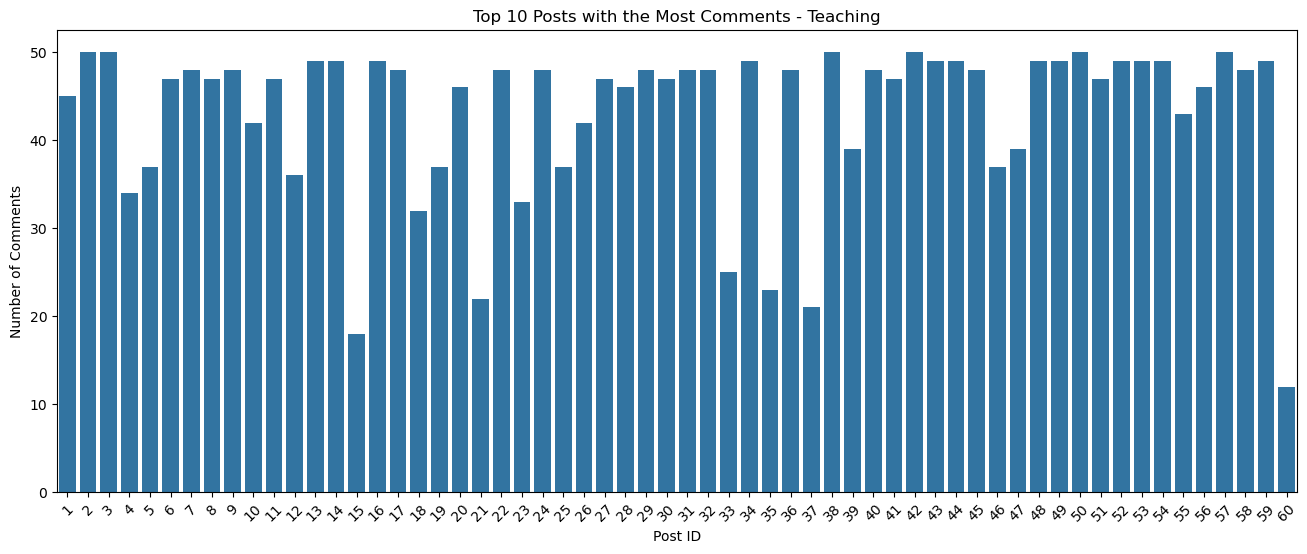

In [26]:
a = """SELECT post_id, 
count(comment_id) as num_comments 
FROM teaching_comments
group by post_id"""
cur.execute(a).fetchall()
df = pd.read_sql_query(a, conn)

# Sort and select the top 10 most commented posts
top_posts = df.sort_values(by='num_comments', ascending=False).head(100)

plt.figure(figsize=(16, 6))
sns.barplot(x=top_posts['post_id'], y=top_posts['num_comments'])
plt.xlabel('Post ID')
plt.ylabel('Number of Comments')
plt.title('Top 10 Posts with the Most Comments - Teaching')
plt.xticks(rotation=45)
plt.show()

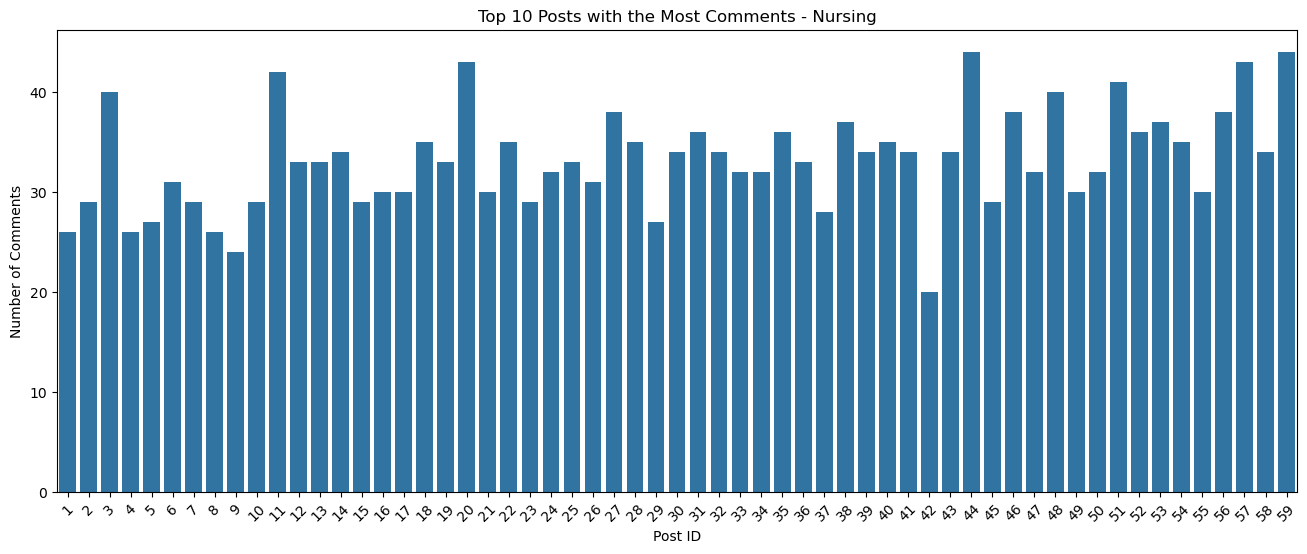

In [29]:
a = """SELECT post_id, 
count(comment_id) as num_comments 
FROM nursing_comments
group by post_id"""
cur.execute(a).fetchall()
df = pd.read_sql_query(a, conn)

# Sort and select the top 10 most commented posts
top_posts = df.sort_values(by='num_comments', ascending=False).head(100)

plt.figure(figsize=(16, 6))
sns.barplot(x=top_posts['post_id'], y=top_posts['num_comments'])
plt.xlabel('Post ID')
plt.ylabel('Number of Comments')
plt.title('Top 10 Posts with the Most Comments - Nursing')
plt.xticks(rotation=45)
plt.show()

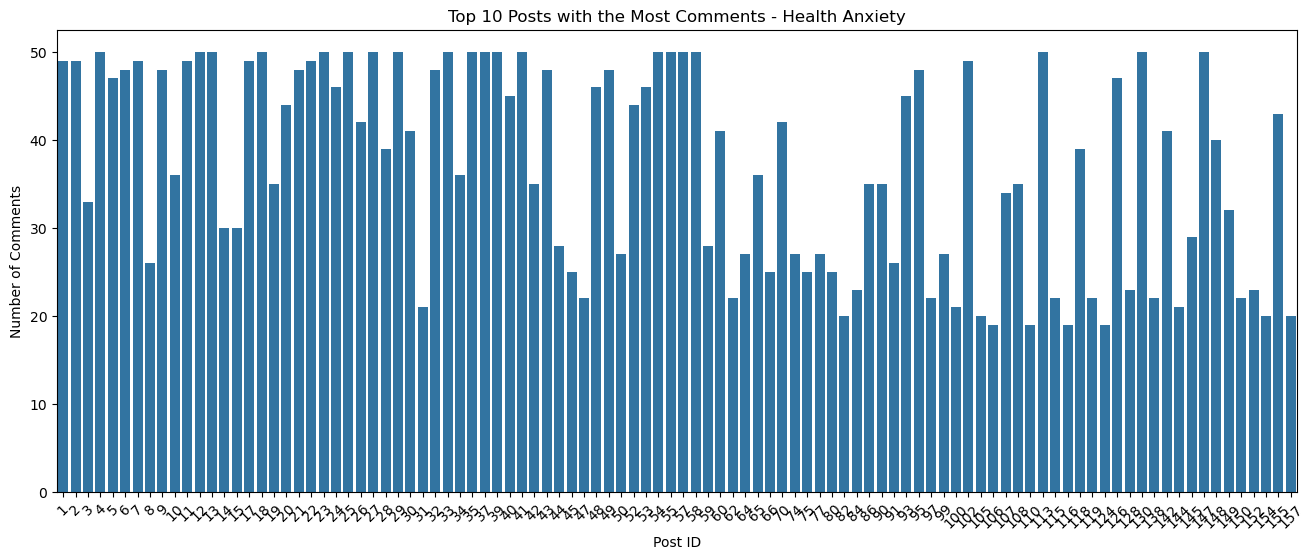

In [30]:
a = """SELECT post_id, 
count(comment_id) as num_comments 
FROM health_anxiety_comments
group by post_id"""
cur.execute(a).fetchall()
df = pd.read_sql_query(a, conn)

# Sort and select the top 10 most commented posts
top_posts = df.sort_values(by='num_comments', ascending=False).head(100)

plt.figure(figsize=(16, 6))
sns.barplot(x=top_posts['post_id'], y=top_posts['num_comments'])
plt.xlabel('Post ID')
plt.ylabel('Number of Comments')
plt.title('Top 10 Posts with the Most Comments - Health Anxiety')
plt.xticks(rotation=45)
plt.show()

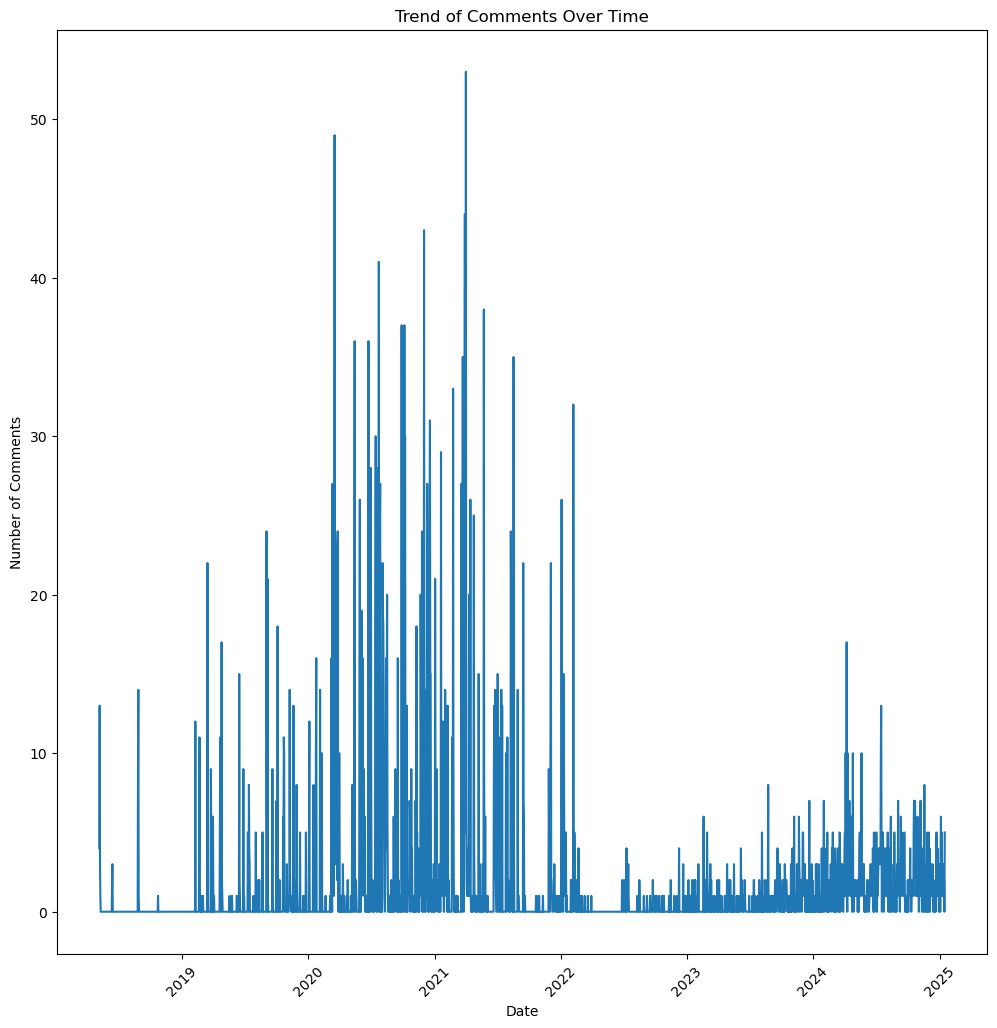

In [70]:
# Connect to the database
conn = sqlite3.connect('raam_database.db')

# Load timestamped comments data
query = "SELECT comment_timestamp FROM health_anxiety_comments"
df_time = pd.read_sql(query, conn)

# Convert timestamps, handling errors
df_time['comment_timestamp'] = pd.to_datetime(df_time['comment_timestamp'], errors='coerce')

# Drop rows where conversion failed (e.g., "Unknown")
df_time = df_time.dropna()

# Resample by day to count comments per day
df_time = df_time.set_index('comment_timestamp').resample('D').size().reset_index()
df_time.columns = ['Date', 'Number of Comments']

# Plot
plt.figure(figsize=(12, 12))
sns.lineplot(x='Date', y='Number of Comments', data=df_time)
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.title('Trend of Comments Over Time')
plt.xticks(rotation=45)
plt.show()

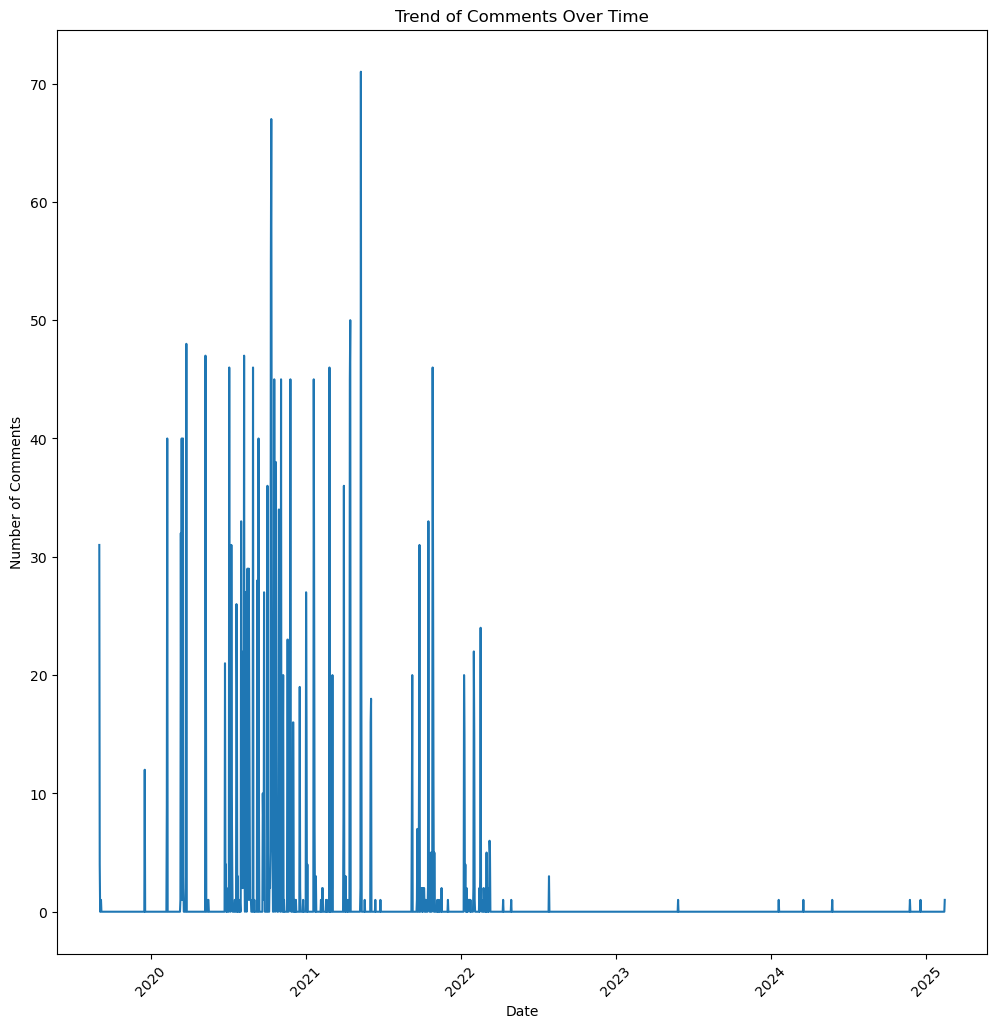

In [71]:
# Connect to the database
conn = sqlite3.connect('raam_database.db')

# Load timestamped comments data
query = "SELECT comment_timestamp FROM teaching_comments"
df_time = pd.read_sql(query, conn)

# Convert timestamps, handling errors
df_time['comment_timestamp'] = pd.to_datetime(df_time['comment_timestamp'], errors='coerce')

# Drop rows where conversion failed (e.g., "Unknown")
df_time = df_time.dropna()

# Resample by day to count comments per day
df_time = df_time.set_index('comment_timestamp').resample('D').size().reset_index()
df_time.columns = ['Date', 'Number of Comments']

# Plot
plt.figure(figsize=(12, 12))
sns.lineplot(x='Date', y='Number of Comments', data=df_time)
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.title('Trend of Comments Over Time')
plt.xticks(rotation=45)
plt.show()

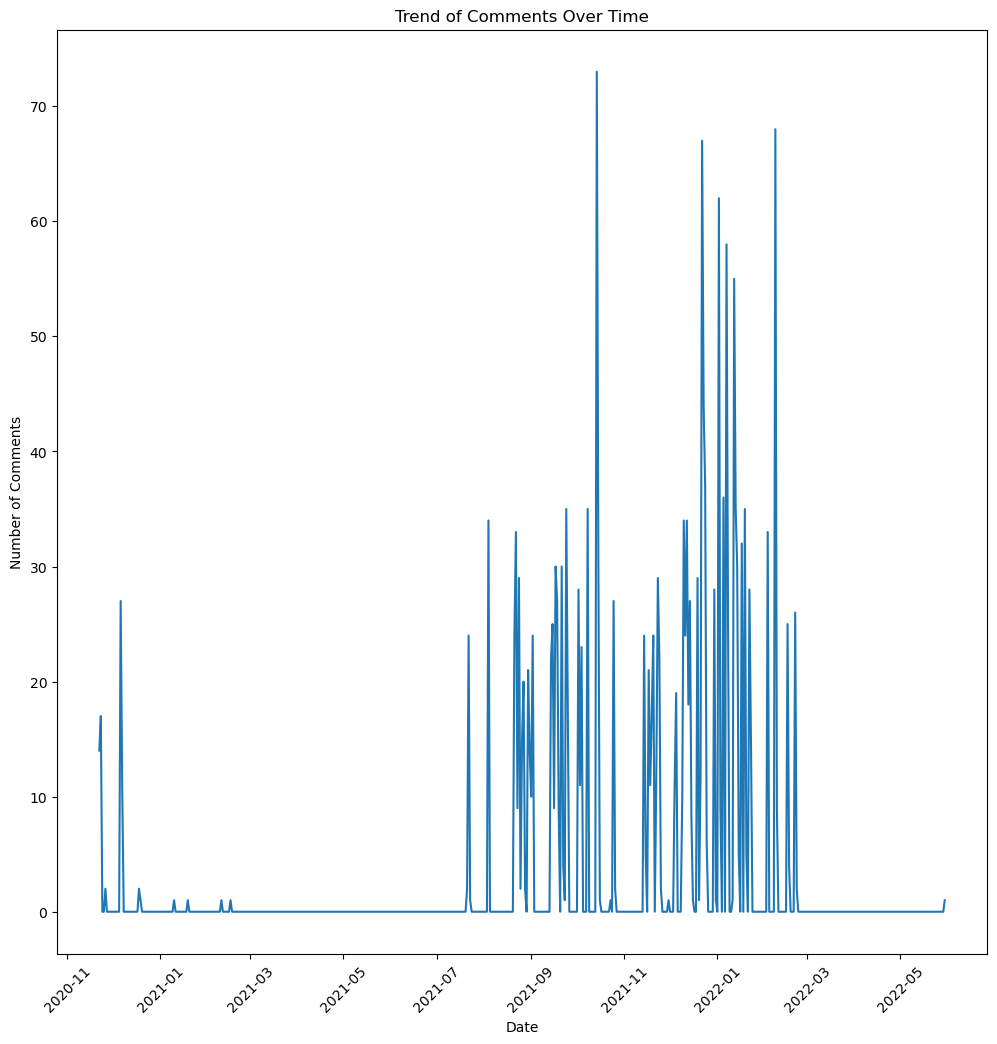

In [72]:
# Connect to the database
conn = sqlite3.connect('raam_database.db')

# Load timestamped comments data
query = "SELECT comment_timestamp FROM nursing_comments"
df_time = pd.read_sql(query, conn)

# Convert timestamps, handling errors
df_time['comment_timestamp'] = pd.to_datetime(df_time['comment_timestamp'], errors='coerce')

# Drop rows where conversion failed (e.g., "Unknown")
df_time = df_time.dropna()

# Resample by day to count comments per day
df_time = df_time.set_index('comment_timestamp').resample('D').size().reset_index()
df_time.columns = ['Date', 'Number of Comments']

# Plot
plt.figure(figsize=(12, 12))
sns.lineplot(x='Date', y='Number of Comments', data=df_time)
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.title('Trend of Comments Over Time')
plt.xticks(rotation=45)
plt.show()